In [14]:
from pathlib import Path
import pandas as pd

# Prepare dataset

In [ ]:
#Unzip Dataset from https://ai.stanford.edu/~amaas/data/sentiment/
!tar -xvf  'aclImdb_v1.tar.gz' -C 'data/'

In [ ]:
#Function for spliting data to train and test with the label of 0 or 1
def read_imdb_split(split_dir):
    split_dir = Path(split_dir)
    texts = []
    labels = []
    for label_dir in ["pos", "neg"]:
        for text_file in (split_dir / label_dir).iterdir():
            texts.append(text_file.read_text(errors="ignore"))
            labels.append(0 if label_dir is "neg" else 1)
    return texts, labels


train_texts, train_labels = read_imdb_split('data/aclImdb/train')
test_texts, test_labels = read_imdb_split('data/aclImdb/test')



In [ ]:
#Creting train dataset
from sklearn.utils import shuffle

data = pd.DataFrame({'text':train_texts, 'label':train_labels})
train_data = data
train_data = shuffle(train_data)
train_data.head()



,text,label
10021,"""I'll Take You There"" tells of a woebegone man...",1
18602,I don't know what the rest of you guys watch S...,0
22470,Well...the movie was a fun watch. The main pro...,0
11873,I decided to watch this because of the recomme...,1
21263,When I refer to Malice as a film noir I am not...,0


In [ ]:
train_data.shape

(25000, 2)

In [ ]:
#Creting test dataset
data = pd.DataFrame({'text':test_texts, 'label':test_labels})
test_data = data
test_data = shuffle(test_data)
test_data.head()

,text,label
13152,This movie is stupid. There's no getting aroun...,0
3268,Nazarin by the acclaimed surrealist Bunuel is ...,1
16421,I want very much to believe that the above quo...,0
13962,"Ridiculous, nauseating doggerel with terrible ...",0
24790,Stunning blonde Natasha Henstridge is the youn...,0


In [ ]:
test_data.shape

(25000, 2)

In [ ]:
#Saving both datasets as .csv
train_data.to_csv('train_data_imdb.csv',index=False)
test_data.to_csv('test_data_imdb.csv',index=False)

# Let's look at data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [16]:
train_data = pd.read_csv('train_data_imdb.csv')

In [ ]:
df_number_of_categories = train_data.groupby(['label']).label.count().reset_index(name='Count')

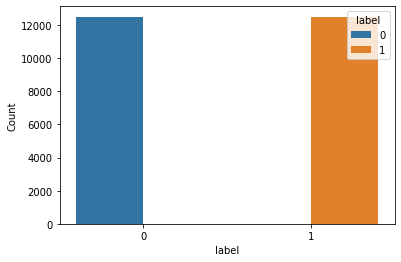

In [ ]:
sns.barplot(data=df_number_of_categories, y='Count', x='label', hue='label')

In [ ]:
df_number_of_categories

,label,Count
0,0,12500
1,1,12500


- The train dataset is balanced
- It contains two labels wherest **0 - negative**, **1 - positive**

- For the test dataset I'll be using only first 10K samples from total of 25K

# Tokenize sentences and remove puncuation
- I won't be using this method later, but it's good for visual text analysis

In [4]:
import itertools
import nltk
from textblob import TextBlob

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return tweet_blob.words

# Most common words in train dataset

In [17]:
train_data['Words'] = train_data['text'].apply(form_sentence)

In [18]:
words = list(itertools.chain(*train_data.Words))

In [19]:
word_freq = nltk.FreqDist(words)

In [ ]:
word_freq

In [ ]:
#How many unique words train dataset contains
len(word_freq)

122093

In [ ]:
#Longest movie review
max(train_data.Words.apply(len))

2511

In [ ]:
#Average review length
train_data.Words.str.len().mean()

239.92564

- The train dataset contains **122093** unique words
- The longest review is **2511** words long
- The average review length is **240** words

# Histogram of words in review

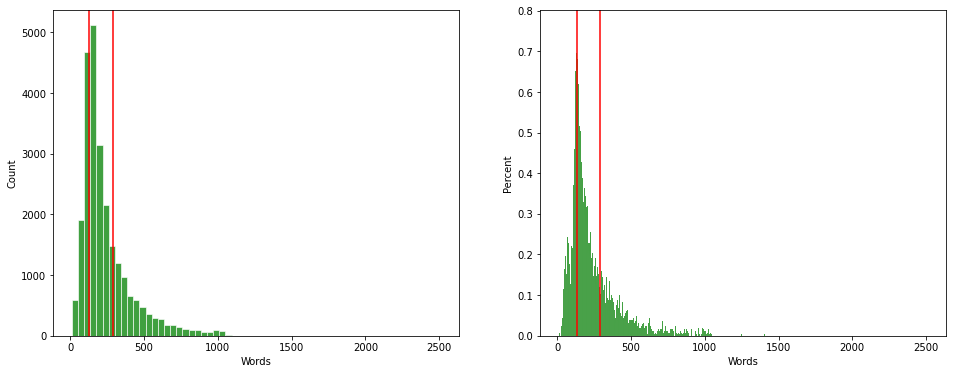

In [20]:
fig = plt.figure(figsize=(16,6))
fig = plt.subplot(1,2,1)
sns.histplot(train_data.Words.apply(len), bins=60, edgecolor='white', color='green')
plt.axvline(train_data.Words.apply(len).quantile(0.25), color='red')
plt.axvline(train_data.Words.apply(len).quantile(0.75), color='red')

fig = plt.subplot(1,2,2)
sns.histplot(train_data.Words.apply(len), bins=60, edgecolor='white', color='green', stat="percent", discrete=True)
plt.axvline(train_data.Words.apply(len).quantile(0.25), color='red')
plt.axvline(train_data.Words.apply(len).quantile(0.75), color='red')

- The interquartile range is between 130 and 292 words

# Let's create a Word Cloud for most common words

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

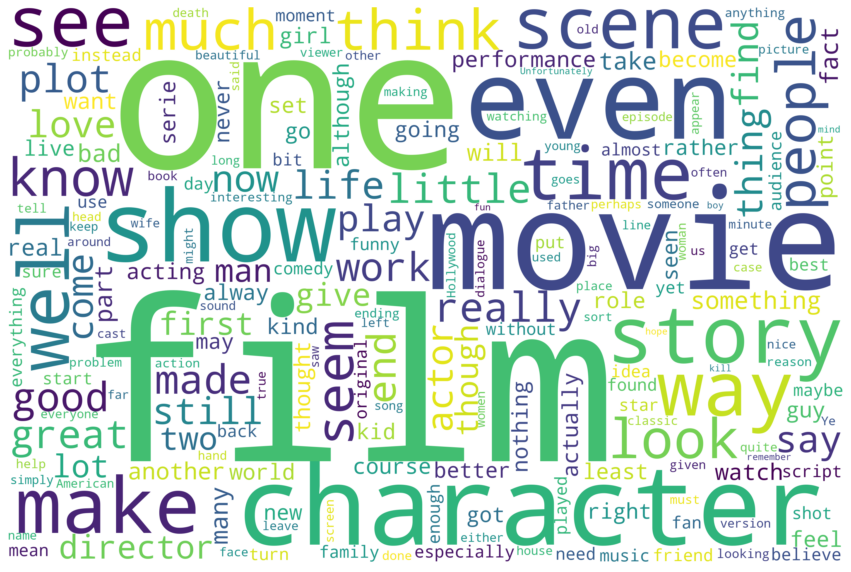

In [ ]:
text = " ".join(review for review in train_data.text)

stopwords = set(STOPWORDS)
stopwords.update(["br"])

wordcloud = WordCloud(stopwords=stopwords, width= 3000, height = 2000,background_color="white").generate(text)

plt.figure(figsize=(15,11))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Now we can clearly see what are the most common words in **Train dataset**